In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import string
import nltk
%matplotlib inline

In [2]:
train=pd.read_csv("train_E6oV3lV.csv")
test=pd.read_csv("test_tweets_anuFYb8.csv")

In [3]:
comb=train.append(test,ignore_index=True)

c:\program files (x86)\python\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [4]:
#removing punctuation,usernames,links,hashtags from tweets
def remove(x):
    x=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)","",x).split())
    return x

comb['clean_tweet']=comb['tweet'].map(lambda y: remove(y))

In [5]:
comb.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they d...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation


In [6]:
#converting into lowercase
comb['clean_tweet']=comb['clean_tweet'].map(lambda y:str(y).lower())

In [7]:
#remove numbers
def remove_digits(x):
    x=''.join([i for i in x if not i.isdigit()])
    return x
comb['clean_tweet']=comb['clean_tweet'].map(lambda y:remove_digits(str(y)))

#remove non-ascii characters
def remove_non_ascii(x):
    x=''.join(i for i in x if ord(i)<128)
    return x
comb['clean_tweet']=comb['clean_tweet'].map(lambda y:remove_non_ascii(y))

In [10]:
#tokenizing tweets
from nltk.tokenize import word_tokenize
def tokenize(x):
    x=word_tokenize(x)
    return x
comb['clean_tweet']=comb['clean_tweet'].map(lambda y: tokenize(y))

In [11]:
comb.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunctional, and, is, ..."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,"[thanks, for, lyft, credit, i, cant, use, caus..."
2,3,0.0,bihday your majesty,"[bihday, your, majesty]"
3,4,0.0,#model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0.0,factsguide: society now #motivation,"[factsguide, society, now, motivation]"


In [13]:
#remove stopwords
from nltk.corpus import stopwords
words=set(stopwords.words('english'))
def remove_stopwords(x):
    x=[i for i in x if i not in words]
    return x
comb['clean_tweet']=comb['clean_tweet'].map(lambda y:remove_stopwords(y))

In [15]:
#Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
l=WordNetLemmatizer()
def lemmatizer(x):
    x=[l.lemmatize(i) for  i in x]
    return x
comb['clean_tweet']=comb['clean_tweet'].map(lambda y:lemmatizer(y))

In [16]:
#remove whitespace characters
def remove_whitespace(x):
    x=[i.replace(' ','') for i in x]
    return x
comb['clean_tweet']=comb['clean_tweet'].map(lambda y:remove_whitespace(y))

In [17]:
#detokenize
def detokenize(x):
    l=' '.join(x)
    x=l
    return x
comb['clean_tweet']=comb['clean_tweet'].map(lambda y:detokenize(y))

In [18]:
comb.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...
2,3,0.0,bihday your majesty,bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0.0,factsguide: society now #motivation,factsguide society motivation


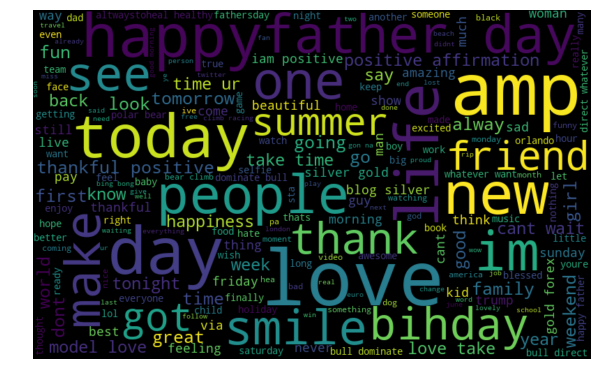

In [19]:
#wordcloud
all_words=' '.join([text for text in comb['clean_tweet']])
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

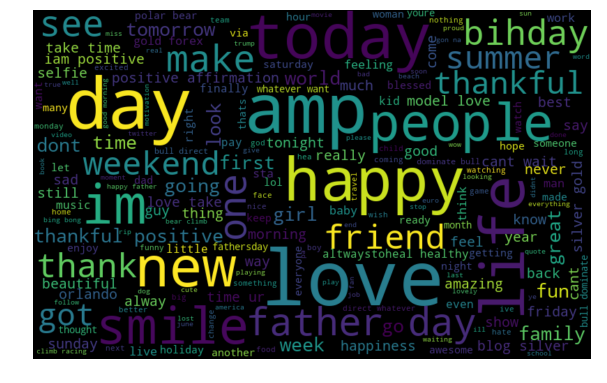

In [20]:
#words in non-racist tweets
pos_words =' '.join([text for text in comb['clean_tweet'][comb['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pos_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

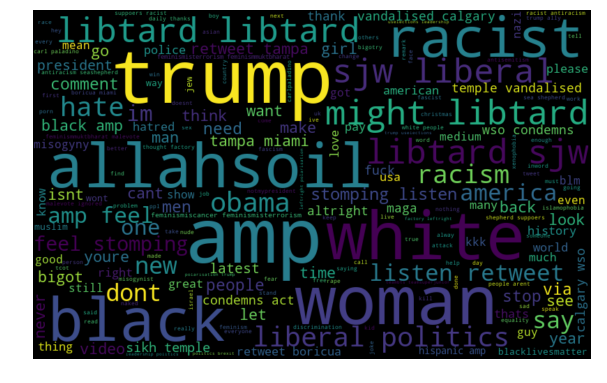

In [21]:
#words in racist tweets
neg_words = ' '.join([text for text in comb['clean_tweet'][comb['label'] == 1]])

wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(neg_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [24]:
#feature extraction using tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer=TfidfVectorizer(max_df=0.85,min_df=3,max_features=1000,stop_words='english')

tfidf=tfidf_vectorizer.fit_transform(comb['clean_tweet'])

In [25]:
#separating into train and validation sets

train_tfidf=tfidf[:31962,:]
test_tfidf=tfidf[31962:,:]

from sklearn.model_selection import train_test_split

x_train,x_valid,y_train,y_valid=train_test_split(train_tfidf,train['label'],random_state=42,test_size=0.3)


In [28]:
#model building
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

lreg=LogisticRegression()
mnb=MultinomialNB()
per=Perceptron()

In [38]:
#logistic regression
from IPython.display import display
lreg.fit(x_train,y_train)

y_pred=lreg.predict_proba(x_valid)
y_pred=y_pred[:,1]>=0.3
y_pred=y_pred.astype(np.int)

display(f1_score(y_valid,y_pred))
display(confusion_matrix(y_valid,y_pred))

c:\program files (x86)\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5346358792184724

array([[8764,  141],
       [ 383,  301]], dtype=int64)

In [32]:
#MultinomialNB
mnb.fit(x_train,y_train)

y_pred_mnb=mnb.predict(x_valid)

display(f1_score(y_valid,y_pred_mnb))
display(confusion_matrix(y_valid,y_pred_mnb))

0.4150110375275938

array([[8871,   34],
       [ 496,  188]], dtype=int64)

In [33]:
#Perceptron
per.fit(x_train,y_train)

y_pred_per=per.predict(x_valid)

display(f1_score(y_valid,y_pred_per))
display(confusion_matrix(y_valid,y_pred_per))

c:\program files (x86)\python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.42171518489378446

array([[8586,  319],
       [ 416,  268]], dtype=int64)

In [39]:
y_test_pred=mnb.predict(test_tfidf)

In [40]:
test['label']=y_test_pred
submission=test[['id','label']]
submission.to_csv("submission.csv",index=False)